## Введение в DS и  машинное обучение

### Знакомство с Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.iloc[0:10,0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
5,female,group B,associate's degree,standard,none
6,female,group B,some college,standard,completed
7,male,group B,some college,free/reduced,none
8,male,group D,high school,free/reduced,completed
9,female,group B,high school,free/reduced,none


In [5]:
mean_math_score = df['math score'].mean()
mean_math_score

66.089

### Фильтрация данных

In [6]:
df_mean_scrore = df.loc[(df.gender == 'female') & (df['math score'] > mean_math_score),['gender', 'math score']]

In [7]:
len(df.lunch.loc[df.lunch == 'free/reduced']) / len(df)

0.355

In [8]:
standard_lunch_stud = df.loc[df.lunch == 'standard']
free_reduced_lunch_stud = df.loc[df.lunch == 'free/reduced']

In [9]:
standard_lunch_stud.describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [10]:
free_reduced_lunch_stud.describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


In [11]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [12]:
df.columns = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score']

In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
# отбираем данные по какому то условю вручную
df.loc[df.writing_score > 99].head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100


In [15]:
# то же самое, используя метод query()
df.query('writing_score > 99').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
377,female,group D,master's degree,free/reduced,completed,85,95,100


### Группировка и агрегация данных

In [16]:
score_columns = [i for i in list(df) if 'score' in i]

In [17]:
score_columns

['math_score', 'reading_score', 'writing_score']

In [18]:
df[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [19]:
df.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [20]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
# группируем данные по полу и находим для них средние значения оценок
df.groupby('gender', as_index= False)\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [22]:
# группируем данные по нескольким признакам
df.groupby(['gender', 'race/ethnicity'], as_index= False)\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [23]:
# мульти индексы

In [24]:
score_mean = df.groupby(['gender', 'race/ethnicity'])\
    .aggregate({'math_score': 'mean', 'reading_score': 'mean' })\
        .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score' })

In [25]:
score_mean.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [26]:
df.sort_values(['gender','math_score' ],ascending= False) \
    .groupby('gender').head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [27]:
df['total_score'] = (df.math_score+df.reading_score+df.writing_score)

In [28]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [29]:
df = df.assign(total_score_mean = df.total_score/3)

In [30]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
df.drop(['total_score'], axis=1).head(5)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [32]:
# создаем датасет Доты 2 
dota_hero_stats = pd.read_csv('dota_hero_stats.csv')

In [33]:
dota_hero_stats

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [34]:
dota_hero_stats.roles.values

array(["['Carry', 'Escape', 'Nuker']",
       "['Initiator', 'Durable', 'Disabler', 'Jungler']",
       "['Support', 'Disabler', 'Nuker', 'Durable']",
       "['Carry', 'Disabler', 'Jungler', 'Nuker', 'Initiator']",
       "['Support', 'Disabler', 'Nuker', 'Jungler']",
       "['Carry', 'Disabler', 'Pusher']",
       "['Support', 'Initiator', 'Disabler', 'Nuker']",
       "['Carry', 'Pusher', 'Escape']",
       "['Carry', 'Support', 'Escape', 'Nuker', 'Disabler']",
       "['Carry', 'Escape', 'Durable', 'Nuker', 'Disabler']",
       "['Carry', 'Nuker']", "['Carry', 'Escape', 'Pusher', 'Nuker']",
       "['Initiator', 'Disabler', 'Escape', 'Nuker']",
       "['Disabler', 'Initiator', 'Durable', 'Nuker']",
       "['Carry', 'Durable', 'Nuker', 'Pusher']",
       "['Initiator', 'Disabler', 'Support', 'Nuker', 'Escape', 'Jungler']",
       "['Carry', 'Escape', 'Nuker', 'Initiator', 'Disabler']",
       "['Carry', 'Disabler', 'Initiator', 'Durable', 'Nuker']",
       "['Carry', 'Nuker', 'Pu

In [35]:
dota_hero_stats.roles.describe()

count                                  117
unique                                 100
top       ['Support', 'Disabler', 'Nuker']
freq                                     3
Name: roles, dtype: object

In [36]:
dota_hero_stats.groupby('legs').describe()

Unnamed: 0                                                         id  \
          count       mean        std   min   25%   50%   75%    max count   
legs                                                                         
0          11.0  46.000000  32.227318   9.0  20.0  38.0  76.0   92.0  11.0   
2          95.0  58.789474  34.307091   0.0  29.5  58.0  86.5  116.0  95.0   
4           7.0  61.714286  31.721256   2.0  53.0  61.0  84.0   95.0   7.0   
6           3.0  68.000000  46.679760  15.0  50.5  86.0  94.5  103.0   3.0   
8           1.0  59.000000        NaN  59.0  59.0  59.0  59.0   59.0   1.0   

                                                           
           mean        std   min   25%   50%   75%    max  
legs                                                       
0     47.727273  32.554849  10.0  21.5  40.0  78.0   94.0  
2     60.842105  34.994928   1.0  31.5  60.0  88.5  129.0  
4     63.571429  32.035694   3.0  55.0  63.0  86.0   97.0  
6     69.666667  47.247575  16.0  52.0  88.0  96.5  105.0  
8     61.000000        NaN  61.0  61.0  61.0  61.0   61.0

In [37]:
# зарплаты Лупы и Пупы
accountancy = pd.read_csv('accountancy.csv')
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [38]:
accountancy.groupby(['Executor','Type']).aggregate({'Salary': 'mean'})

Salary
Executor Type            
Loopa    A      58.000000
         B     145.166667
         C     154.333333
         D     137.714286
         E     164.000000
         F     238.000000
Pupa     A     160.833333
         B      77.000000
         C      74.500000
         D     146.500000
         E     131.200000
         F     136.250000

In [39]:
dota_hero_stats.groupby(['attack_type','primary_attr']).describe()

Unnamed: 0                                           \
                              count       mean        std   min    25%   50%   
attack_type primary_attr                                                       
Melee       agi                19.0  61.315789  38.233279   0.0  34.50  65.0   
            int                 2.0  67.500000  20.506097  53.0  60.25  67.5   
            str                35.0  62.657143  34.265351   1.0  31.50  69.0   
Ranged      agi                18.0  46.111111  32.737618   5.0  15.25  44.5   
            int                40.0  55.225000  32.472069   2.0  28.75  50.5   
            str                 3.0  84.666667  25.774665  57.0  73.00  89.0   

                                          id             ...                 \
                            75%    max count       mean  ...     75%    max   
attack_type primary_attr                                 ...                  
Melee       agi           89.00  114.0  19.0  63.315789  ...   91.00  120.0   
            int           74.75   82.0   2.0  69.500000  ...   76.75   84.0   
            str           95.50  116.0  35.0  64.771429  ...   97.50  129.0   
Ranged      agi           67.75  111.0  18.0  47.777778  ...   69.75  113.0   
            int           78.75  115.0  40.0  57.275000  ...   80.75  121.0   
            str           98.50  108.0   3.0  86.666667  ...  100.50  110.0   

                          legs                                               
                         count      mean       std  min  25%  50%  75%  max  
attack_type primary_attr                                                     
Melee       agi           19.0  2.315789  1.796683  0.0  2.0  2.0  2.0  8.0  
            int            2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0  
            str           35.0  2.171429  0.890661  0.0  2.0  2.0  2.0  6.0  
Ranged      agi           18.0  1.444444  1.149026  0.0  0.0  2.0  2.0  4.0  
            int           40.0  2.250000  0.926809  0.0  2.0  2.0  2.0  6.0  
            str            3.0  1.333333  1.154701  0.0  1.0  2.0  2.0  2.0  

[6 rows x 24 columns]

In [40]:
#Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), 
#группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.
#Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)!
date = pd.read_csv('algae.csv')

In [41]:
date.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [42]:
date.columns

Index(['species', 'genus', 'group', 'sucrose', 'alanin', 'citrate', 'glucose',
       'oleic_acid'],
      dtype='object')

In [43]:
date.groupby('genus').aggregate({'sucrose':'mean','alanin':'mean', 'citrate':'mean', 'glucose':'mean',
       'oleic_acid':'mean'})

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [44]:
date.query('genus == "Fucus"').describe()

,sucrose,alanin,citrate,glucose,oleic_acid
count,3.000000,3.000000,3.000000,3.000000,3.000000
mean,4.355112,3.566411,4.214878,2.814803,3.367647
std,2.110570,3.149943,2.691679,0.713559,3.050376
min,3.001472,0.346431,1.216767,2.272724,0.304573
25%,3.139171,2.028965,3.110515,2.410591,1.848888
50%,3.276870,3.711498,5.004262,2.548459,3.393203
75%,5.031933,5.176401,5.713934,3.085842,4.899184
max,6.786996,6.641303,6.423606,3.623225,6.405165


### Визуализация Seaborn

In [45]:
import pandas as pd
import numpy as np


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
students_performance = pd.read_csv('StudentsPerformance.csv')

In [48]:
students_performance = students_performance.rename(columns={'parental level of education':'parental_level_of_education', 
                             'test preparation course':'test_preparation_course', 'math score':'math_score', 
                             'reading score':'reading_score','writing score':'writing_score'})

In [49]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


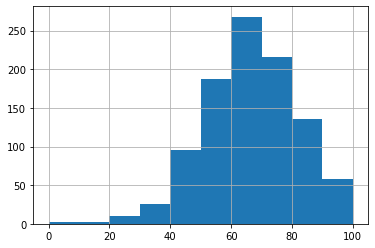

In [50]:
# встренная визуализация pandas
students_performance.math_score.hist()

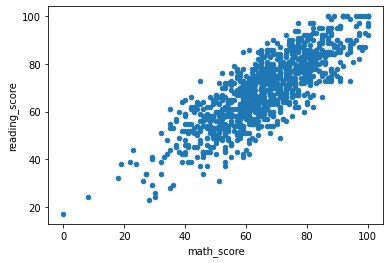

In [51]:
# построение scatter plot
students_performance.plot.scatter(x='math_score', y ='reading_score' )

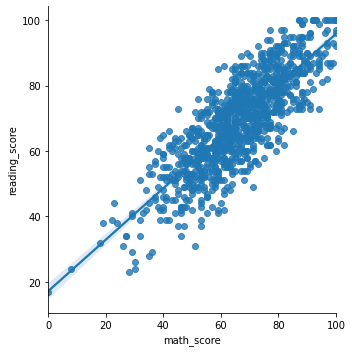

In [52]:
# построение scatter plot, используя seaborn
sns.lmplot(x='math_score', y ='reading_score', data=students_performance)

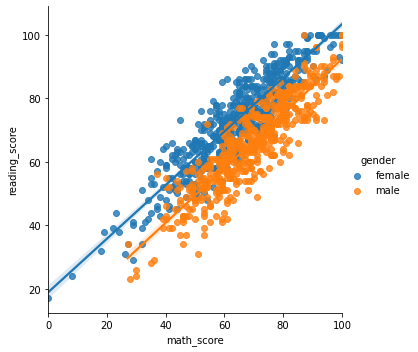

In [53]:
# добавляем группировку по полу hue='gender'
sns.lmplot(x='math_score', y ='reading_score',hue='gender', data=students_performance)

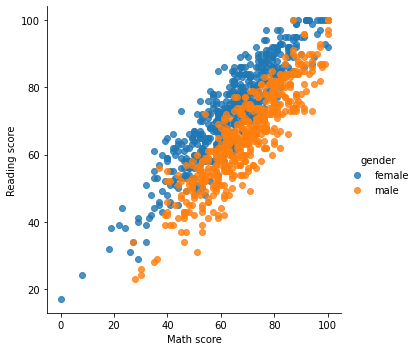

In [54]:
# убрали регрессионные прямые fit_reg=False
ax = sns.lmplot(x='math_score', y ='reading_score',hue='gender', data=students_performance,fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

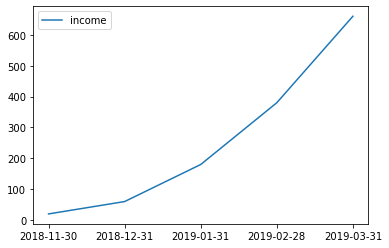

In [55]:
df = pd.read_csv('income.csv')
sns.lineplot(data=df)

In [56]:
df = pd.read_csv('dataset_209770_6 (1).txt', sep=' ')
df.head()

,x,y
0,903.457968,601.381145
1,101.450178,811.693718
2,296.931632,95.784660
3,186.389986,1207.285848
4,1084.793570,208.632339


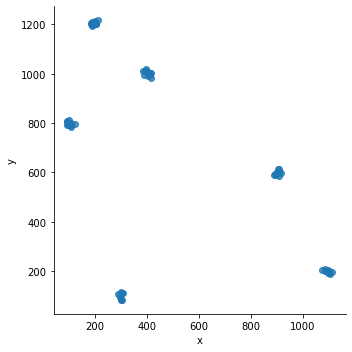

In [57]:
sns.lmplot(x='x',y='y', data=df, fit_reg=False)

In [58]:
df = pd.read_csv('genome_matrix.csv', index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


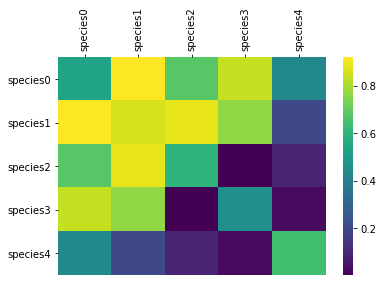

In [59]:

g= sns.heatmap(df,cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

In [60]:
df.index

Index(['species0', 'species1', 'species2', 'species3', 'species4'], dtype='object')

In [61]:
df = pd.read_csv('iris.csv')

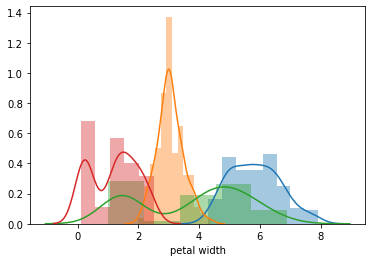

In [81]:
for i in df.columns[1:5]:
    ax = sns.distplot(df[i])

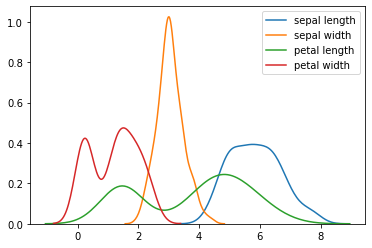

In [82]:
for i in df.columns[1:5]:
    ax = sns.kdeplot(df[i])